# EDA 

### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, wilcoxon, spearmanr, ttest_ind, normaltest

Matplotlib is building the font cache; this may take a moment.


### Load the dataset


In [5]:
data = pd.read_csv('data-collection/raw-data/heart_failure_clinical_records_dataset.csv')

### Display basic stastic

In [6]:
# Display the first few rows of the dataset
data.head()

# Basic statistics
data.describe()

# Check for missing values
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


### Data Normality Tests

In [15]:
# Initialize an empty list to store test results
test_results = []

# Perform Shapiro-Wilk Test and D'Agostino's K^2 Test for each numerical column
for column in data.select_dtypes(include='number').columns:
    shapiro_test = shapiro(data[column])
    dagostino_test = normaltest(data[column])
    
    # Append test results to the list
    test_results.append({
        'Column': column,
        'Shapiro-Wilk Statistic': shapiro_test.statistic,
        'Shapiro-Wilk p-value': shapiro_test.pvalue,
        "D'Agostino's K^2 Statistic": dagostino_test.statistic,
        "D'Agostino's K^2 p-value": dagostino_test.pvalue
    })

# Create a DataFrame from the list of test results
test_results_df = pd.DataFrame(test_results)

# Display the DataFrame with test results
test_results_df

,Column,Shapiro-Wilk Statistic,Shapiro-Wilk p-value,D'Agostino's K^2 Statistic,D'Agostino's K^2 p-value
0,age,0.975470,5.349670e-05,8.951477,1.138182e-02
1,anaemia,0.629612,6.209525e-25,1483.770802,0.000000e+00
2,creatinine_phosphokinase,0.514263,7.050459e-28,307.183765,1.976482e-67
3,diabetes,0.626645,5.115472e-25,1527.897401,0.000000e+00
4,ejection_fraction,0.947316,7.215954e-09,14.165594,8.394219e-04
5,high_blood_pressure,0.603432,1.168593e-25,2294.985351,0.000000e+00
6,platelets,0.911509,2.883451e-12,111.337519,6.658324e-25
7,serum_creatinine,0.551466,5.392796e-27,307.902987,1.379482e-67
8,serum_sodium,0.939028,9.214856e-10,74.364870,7.110067e-17
9,sex,0.603432,1.168593e-25,2294.985351,0.000000e+00


* All columns have very low p-values (typically much smaller than 0.05) for both Shapiro-Wilk and D'Agostino's K^2 tests.
* Therefore, we reject the null hypothesis (data is normally distributed) for all columns.
* This suggests that none of these numerical columns follow a normal distribution, which is important to consider when applying statistical tests and modeling techniques that assume normality

### Visualizing the distribution of data

In [ ]:
for column_name in data.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.histplot(data[column_name], kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.show()

### Correlation Analysis

Spearman Correlation:
                                age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.071924                 -0.093078   
anaemia                   0.071924  1.000000                 -0.216116   
creatinine_phosphokinase -0.093078 -0.216116                  1.000000   
diabetes                 -0.089657 -0.012729                  0.042308   
ejection_fraction         0.074047  0.020366                 -0.067839   
high_blood_pressure       0.105740  0.038182                 -0.080724   
platelets                -0.052091 -0.035608                  0.060033   
serum_creatinine          0.270561 -0.016267                 -0.049936   
serum_sodium             -0.101716  0.061405                  0.016886   
sex                       0.057791 -0.094769                  0.013298   
smoking                   0.030145 -0.107290                 -0.030351   
time                     -0.197524 -0.134652                  0.125823   
DEATH_EVENT    

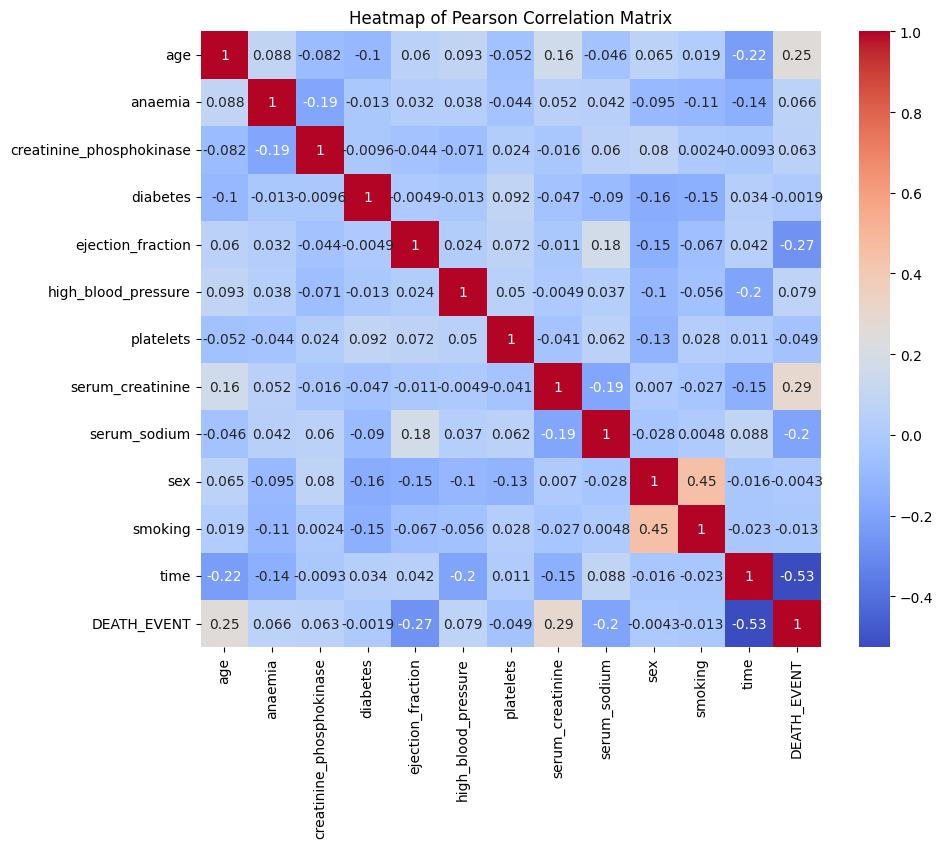

In [16]:
# Spearman correlation
spearman_corr = data.corr(method='spearman')
print('Spearman Correlation:\n', spearman_corr)

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Pearson Correlation Matrix')
plt.show()

In [ ]:
# Save the cleaned and analyzed data
data.to_csv('cleaned_data.csv', index=False)
print('Data has been cleaned and saved to cleaned_data.csv')

# Conclusion

The exploratory data analysis (EDA) revealed significant correlations between clinical parameters (e.g., age, ejection fraction, serum creatinine) and mortality risk in the dataset. Demographic factors like sex and smoking also showed moderate correlations. These findings underscore the importance of these variables in predicting health outcomes and guiding further research or interventions.